In [55]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pickle

from flask import Flask, jsonify, request

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import RFE
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import PowerTransformer, FunctionTransformer, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.metrics import classification_report, balanced_accuracy_score, ConfusionMatrixDisplay

from lightgbm import LGBMClassifier

In [3]:
df = pd.read_csv("./data/wines_dataset.csv", sep = "|")

In [4]:
train, test = train_test_split(df, test_size= 0.1, random_state= 42)

In [5]:
train.to_csv("./data/train_wines.csv")

In [6]:
test.to_csv("./data/test_wines.csv")

In [7]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5847 entries, 3764 to 860
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         5847 non-null   float64
 1   volatile acidity      5847 non-null   float64
 2   citric acid           5847 non-null   float64
 3   residual sugar        5847 non-null   float64
 4   chlorides             5847 non-null   float64
 5   free sulfur dioxide   5847 non-null   float64
 6   total sulfur dioxide  5847 non-null   float64
 7   density               5847 non-null   float64
 8   pH                    5847 non-null   float64
 9   sulphates             5847 non-null   float64
 10  alcohol               5847 non-null   float64
 11  quality               5847 non-null   int64  
 12  class                 5847 non-null   object 
dtypes: float64(11), int64(1), object(1)
memory usage: 639.5+ KB


In [8]:
train.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,5847.000000,5847.000000,5847.000000,5847.000000,5847.000000,5847.000000,5847.000000,5847.000000,5847.000000,5847.000000,5847.000000,5847.000000
mean,7.211279,0.339714,0.319453,5.456225,0.055999,30.598854,115.787070,0.994711,3.218904,0.531115,10.483753,5.816316
std,1.294622,0.163016,0.146191,4.765188,0.034111,17.886676,56.639036,0.003005,0.160252,0.148691,1.192363,0.873717
min,3.900000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,77.000000,0.992350,3.110000,0.430000,9.500000,5.000000
50%,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994900,3.210000,0.510000,10.300000,6.000000
75%,7.700000,0.410000,0.390000,8.100000,0.065000,41.000000,156.000000,0.997000,3.320000,0.600000,11.300000,6.000000
max,15.900000,1.330000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000,9.000000


In [11]:
target = "class"
train[target] = (train[target] == "white").astype(int)
X_train = train.drop(columns = target)
y_train = train[target].copy()

In [19]:
y_train.value_counts(True)

class
1    0.752694
0    0.247306
Name: proportion, dtype: float64

In [ ]:
rf_selection = RandomForestClassifier(max_depth= 10, class_weight= "balanced")
rfe = RFE(rf_selection, n_features_to_select=4)
X_train_s = pd.DataFrame(rfe.fit_transform(X_train, y_train), columns= rfe.get_feature_names_out())

In [28]:
X_train_s

,volatile acidity,chlorides,total sulfur dioxide,sulphates
0,0.12,0.034,99.0,0.57
1,0.55,0.076,40.0,0.59
2,0.17,0.093,136.0,0.49
3,0.26,0.045,166.0,0.46
4,0.21,0.038,183.0,0.48
...,...,...,...,...
5842,0.24,0.047,211.0,0.57
5843,0.22,0.058,125.0,0.45
5844,0.20,0.052,145.0,0.56
5845,0.41,0.032,74.0,0.35


In [79]:

model = LGBMClassifier(max_depth= 10, class_weight= "balanced", random_state= 42)

pipeline = Pipeline(
    [("Imputer", SimpleImputer()),
     ("Model", model)]
)

pipeline.fit(X_train_s.values, y_train.values)

Pipeline(steps=[('Imputer', SimpleImputer()),
                ('Model',
                 LGBMClassifier(class_weight='balanced', max_depth=10,
                                random_state=42))])

In [35]:
X_test = test[X_train_s.columns.to_list()].copy()
y_test = (test[target] == "white").astype(int)

In [81]:
y_pred = pipeline.predict(X_test.values)

c:\Users\dario\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


In [82]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.98      0.99      0.99       153
           1       1.00      0.99      1.00       497

    accuracy                           0.99       650
   macro avg       0.99      0.99      0.99       650
weighted avg       0.99      0.99      0.99       650



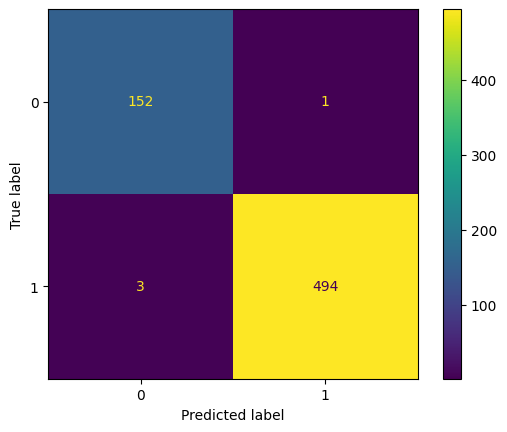

In [83]:
c_matrix = ConfusionMatrixDisplay(confusion_matrix= "cm")
c_matrix.from_predictions(y_test, y_pred)

In [84]:
with open("wine_model.pkl", "wb") as model:
    pickle.dump(pipeline, model)

In [89]:
def predict(args):
    X_new = args
    print(args)
    model = pipeline_2

    def prediction(*args):
        prediction = model.predict(args)
        return dict({f"prediction_{i}": prediction[i].astype(np.int8) for i in range(len(args))})
    
    return prediction(X_new)


In [88]:
predict([0.12, 0.034, 99.0, 0.57])

[0.12, 0.034, 99.0, 0.57]


c:\Users\dario\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


{'prediction_0': np.int64(1)}